In [ ]:
!pip install tensorflow
!pip install pydot graphviz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,ReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data = pd.read_csv('/content/sign_mnist_train.csv')

In [ ]:
print(data['label'])

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64


In [ ]:
X = data.drop('label', axis = 1)
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.1,random_state = 42)

In [ ]:
X_train['pixel1'].describe()

,pixel1
count,19767.000000
mean,145.504072
std,41.343801
min,0.000000
25%,122.000000
50%,150.000000
75%,174.000000
max,255.000000


In [ ]:
model = Sequential()

#First convolutional layer
model.add(Conv2D(32,(3,3),input_shape = (28,28,1),padding = 'same'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size = (2,2)))

#Second convolutional layer
model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(ReLU())
model.add(MaxPooling2D(pool_size = (2,2)))

#Flatten and Fully Connected Layer
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.28))

#Output Layer
model.add(Dense(26,activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,706 (1.62 MB)

 Trainable params: 423,706 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

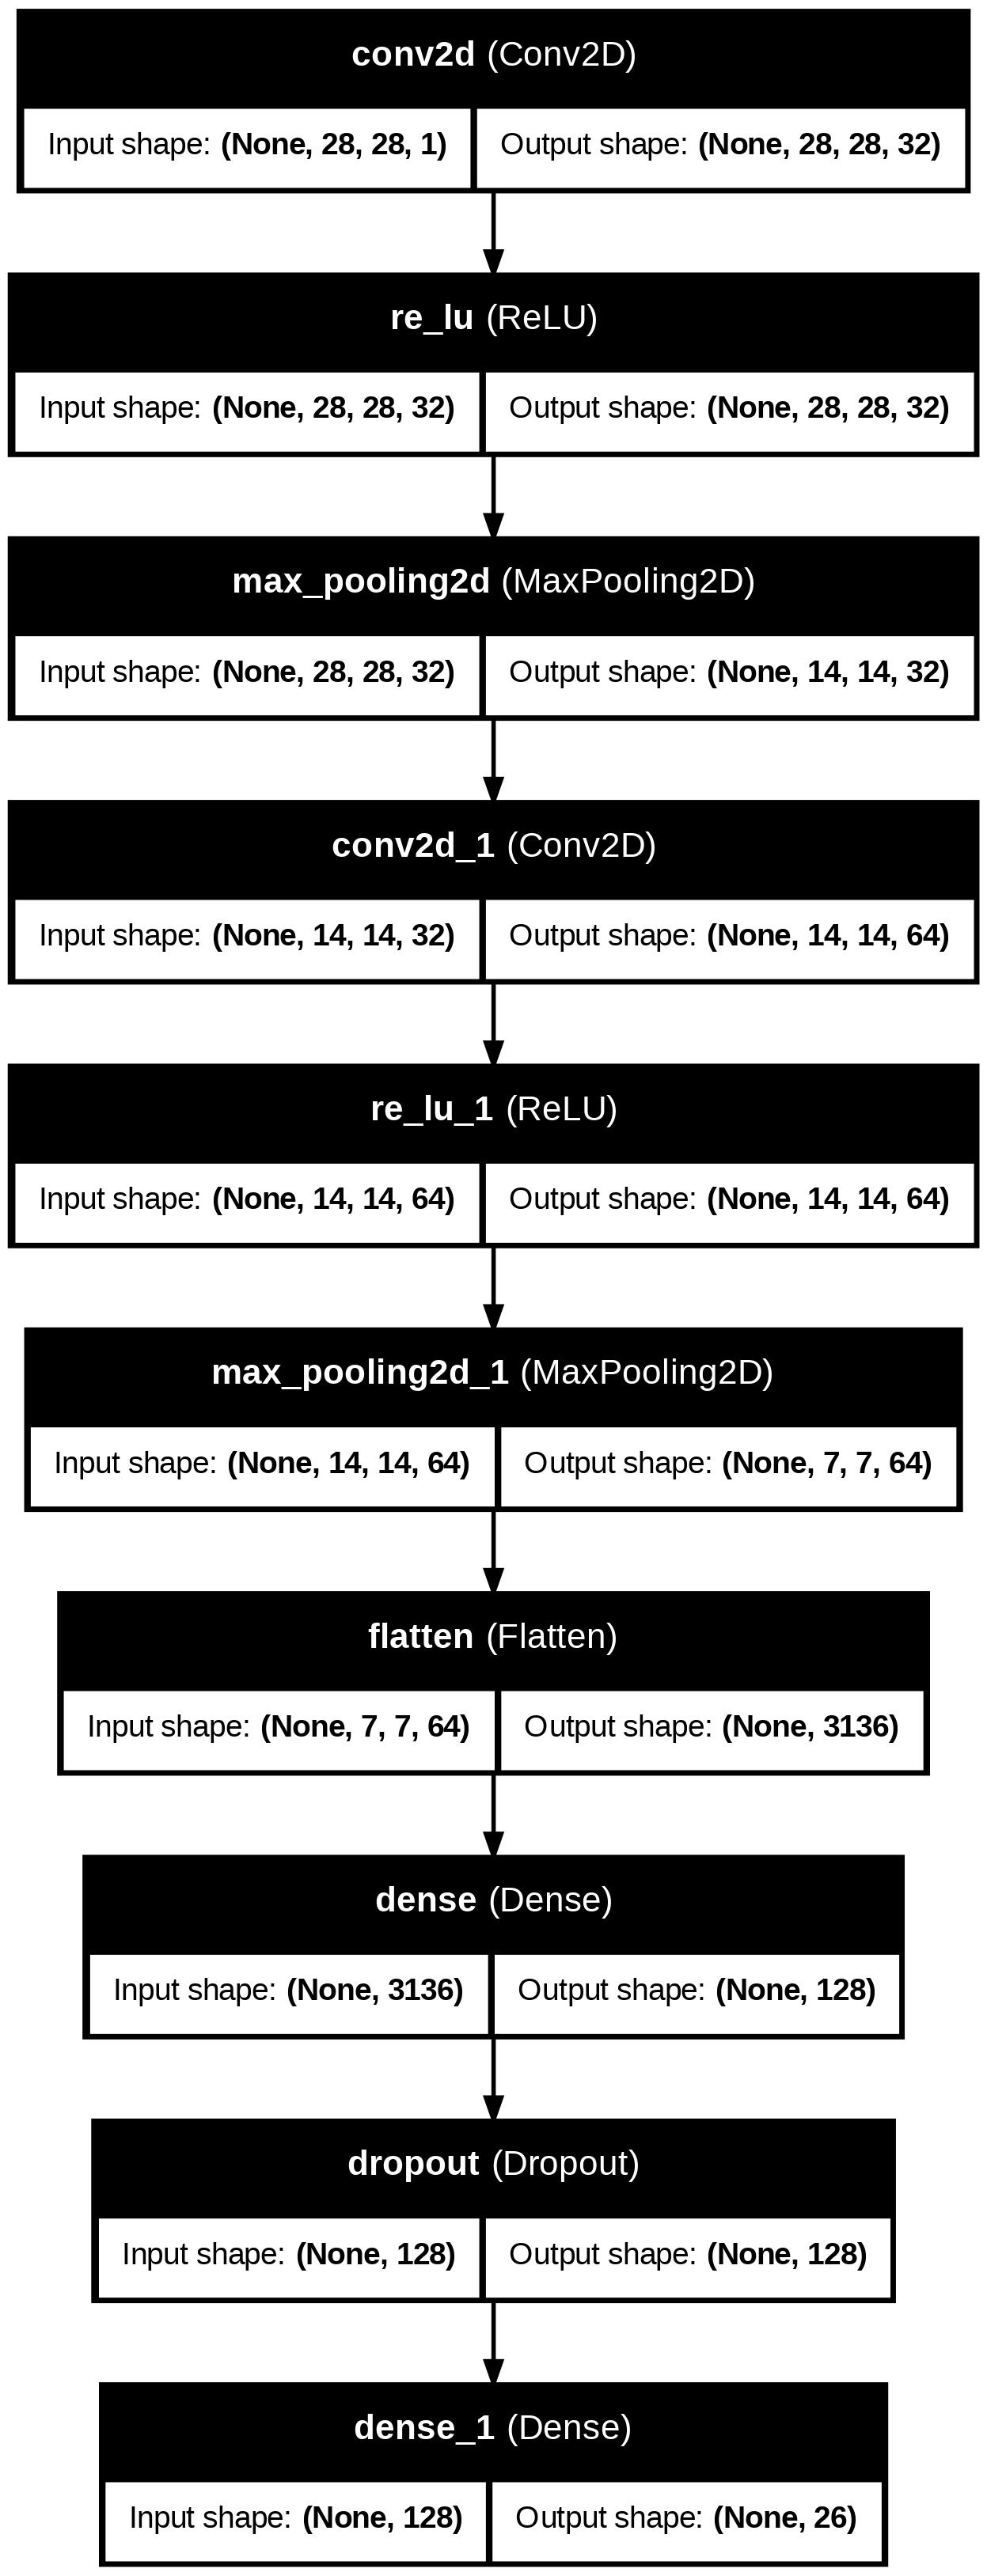

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_val = X_val.to_numpy()

X_train_reshaped = X_train.reshape(-1,28,28,1)
X_test_reshaped = X_test.reshape(-1,28,28,1)
X_val_reshaped = X_val.reshape(-1,28,28,1)

In [ ]:
#Compiling and training the model
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train_reshaped,Y_train,validation_data = (X_val_reshaped,Y_val),epochs = 20,batch_size = 32,verbose = 1)

Epoch 1/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 29s 45ms/step - accuracy: 0.6957 - loss: 0.9157 - val_accuracy: 0.9850 - val_loss: 0.0679
Epoch 2/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9153 - loss: 0.2480 - val_accuracy: 0.9991 - val_loss: 0.0163
Epoch 3/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9497 - loss: 0.1473 - val_accuracy: 0.9968 - val_loss: 0.0114
Epoch 4/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.9714 - loss: 0.0849 - val_accuracy: 0.9995 - val_loss: 0.0039
Epoch 5/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.9680 - loss: 0.0936 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 6/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9805 - loss: 0.0612 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 7/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9807 - loss: 0.0628 - val_accuracy: 0.9991 - val_loss: 0.0059
Epoch 8/20
618/618 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9800 - loss: 0.0638 - 

In [ ]:
# Access the training history
history_dict = history.history

#Store metrics in arrays
training_accuracy = history_dict['accuracy']
training_loss = history_dict['loss']
validation_accuracy = history_dict['val_accuracy']
validation_loss = history_dict['val_loss']

# Print all available metrics
print("Available metrics in history:")
for key in history_dict.keys():
    print(key)

# Print values for each metric
for metric, values in history_dict.items():
    print(f"{metric}: {values}")

Available metrics in history:
accuracy
loss
val_accuracy
val_loss
accuracy: [0.7831739783287048, 0.9302372932434082, 0.9563413858413696, 0.9727829098701477, 0.9719734787940979, 0.9809278249740601, 0.9793595671653748, 0.9812819361686707, 0.9843679070472717, 0.9860879182815552, 0.9865938425064087, 0.9894773960113525, 0.9857844114303589, 0.9898315668106079, 0.9890221357345581, 0.9910962581634521, 0.9895786046981812, 0.9892750382423401, 0.9928163290023804, 0.9921586513519287]
loss: [0.6459768414497375, 0.20165733993053436, 0.12709461152553558, 0.08122164011001587, 0.08496959507465363, 0.059876833111047745, 0.0642767995595932, 0.05867774412035942, 0.05160560458898544, 0.04330920800566673, 0.04212909936904907, 0.03452998027205467, 0.052145808935165405, 0.035097427666187286, 0.03960064426064491, 0.031711041927337646, 0.03696179389953613, 0.04179282486438751, 0.02456175908446312, 0.02899259515106678]
val_accuracy: [0.984979510307312, 0.9990896582603455, 0.9968138337135315, 0.9995448589324951, 

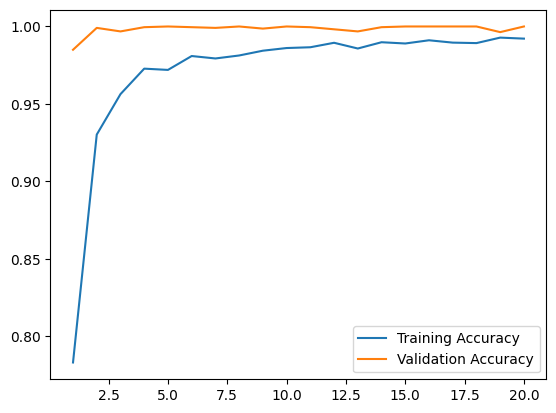

In [ ]:
epochs = range(1,21)
plt.plot(epochs,training_accuracy,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy,label = 'Validation Accuracy')
plt.legend()

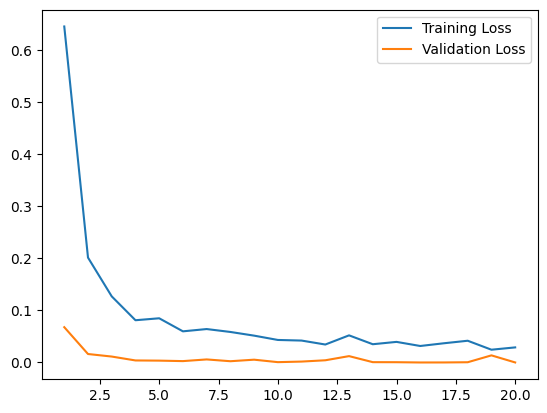

In [ ]:
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.legend()

In [ ]:
#Testing the model on the testing set
test_loss,test_accuracy = model.evaluate(X_test_reshaped,Y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 4.1352e-05
Test Accuracy: 1.0
Test Loss: 5.48905591131188e-05
